                                                                            Workshop #5

                                            Working with DataFrame. Data processing. Clustering tasks.

The purpose of the work: gaining skills in working with DataFrame. Learning methods of data clustering.

Progress: For preparation we use files 5. Visualization.pptx, 6. Visualization.ipynb, 7. Preprocessing.pptx, 8. Preprocessing.ipynb from Lecture folder.

   1. Download the Dataset_all.xlsx file to DataFrame.

In [22]:
import pandas as pd

dataset_path = "Dataset_all.xlsx"
#path to dataset file

dataset = pd.read_excel(dataset_path, header= 1)
dataset

,№иб,Діагноз,пол,возраст,одышка,одышка при физнагрузке,невозможность вдохнуть полной грудью,скованность в гр клетке,нехватка воздуха,нарушение ночного сна,...,отклонение ЭОС,нарушение АВ-проводимости,реполяриз изменения,правые камеры,ритм,нарушение внутрижелуд пров,блокада пучка Гиса,ГМЛЖ,рестриктивный тип,обструктивный тип
0,1440.0,ХОЗЛ,0.0,79.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
1,1484.0,ХОЗЛ,0.0,76.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,3.0,3.0
2,1497.0,ХОЗЛ,1.0,72.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,1530.0,ХОЗЛ,1.0,54.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
4,1583.0,ХОЗЛ,0.0,81.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,4868.0,Пневмонія,1.0,84.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0
128,5033.0,Пневмонія,0.0,67.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0
129,5079.0,Пневмонія,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
130,5050.0,Пневмонія,0.0,82.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


2. Use method for filling gaps from previous workshop (it should be your own method, so pay attention to use only your results from workshop#4).


In [23]:
df_filled = dataset.set_index("№иб")
missed_rows = dataset[dataset.isnull().any(1)]
without_missed_rows = dataset.dropna()
missed_cols= dataset.loc[:, dataset.isnull().any()]
missed_cols_dropna = missed_cols.dropna()

not_missed =  without_missed_rows.drop(list(missed_cols.columns), 1)
not_missed.iloc[:, 2:].apply(pd.to_numeric)

missed_data = missed_rows.drop(list(missed_cols.columns), 1)
missed_data.iloc[:, 2:].apply(pd.to_numeric)

#calculate the distance between the patient with a gap and other patients by the features that do not contain gaps.
dict_lenght, dict_sum_reverse, membership_lev = dict(), dict(), dict()
missed_patients = list(missed_data["№иб"])

for ind in range(len(missed_data)):
    pd_1 = abs(not_missed.iloc[:, 2:] - missed_data.iloc[ind, 2:])
    list_lenght, list_reverse = list(), list()
    for i in range(len(pd_1)):
        val=sum(list(pd_1.iloc[i]))/len(list(missed_cols.columns))
        list_lenght.append(val)
        list_reverse.append(1/val)
    dict_lenght[missed_patients[ind]] = list_lenght
    dict_sum_reverse[missed_patients[ind]] = sum(list_reverse)
#determine the membership degree of the patient with a gap to other patients as a function of the inverse distance. This function is normalized, it varies from 0 to 1 (0 – not similar, 1 – very similar).
for ind in dict_sum_reverse.keys():
    membership_lev[ind] = [(1/dict_lenght[ind][i])/dict_sum_reverse[ind] for i in range(len(dict_lenght[ind]))]
# fill in the gap in the data
for ind, name in enumerate(list(missed_cols)):
    dict_val = {}
    for i, val in membership_lev.items():
        l=[val[k]*float(list(missed_data.iloc[ind, 2:])[k]) for k in range(len(val))]
        dict_val[i] = sum(l)
    df_filled[name] = df_filled[name].fillna(dict_val)
df_filled


C:\Users\olyad\AppData\Local\Temp/ipykernel_12820/4015899030.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  not_missed =  without_missed_rows.drop(list(missed_cols.columns), 1)
C:\Users\olyad\AppData\Local\Temp/ipykernel_12820/4015899030.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  missed_data = missed_rows.drop(list(missed_cols.columns), 1)


,Діагноз,пол,возраст,одышка,одышка при физнагрузке,невозможность вдохнуть полной грудью,скованность в гр клетке,нехватка воздуха,нарушение ночного сна,удушье,...,отклонение ЭОС,нарушение АВ-проводимости,реполяриз изменения,правые камеры,ритм,нарушение внутрижелуд пров,блокада пучка Гиса,ГМЛЖ,рестриктивный тип,обструктивный тип
№иб,,,,,,,,,,,,,,,,,,,,,
1440.0,ХОЗЛ,0.0,79.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
1484.0,ХОЗЛ,0.0,76.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,3.0,3.0
1497.0,ХОЗЛ,1.0,72.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1530.0,ХОЗЛ,1.0,54.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
1583.0,ХОЗЛ,0.0,81.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868.0,Пневмонія,1.0,84.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0
5033.0,Пневмонія,0.0,67.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0
5079.0,Пневмонія,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


Visualize dataframe using PCA method (do all steps from Workshop#3 for data visualization). Use StandardScaler() or MinMaxScaler() method before visualization and different color for different Diagnosis types

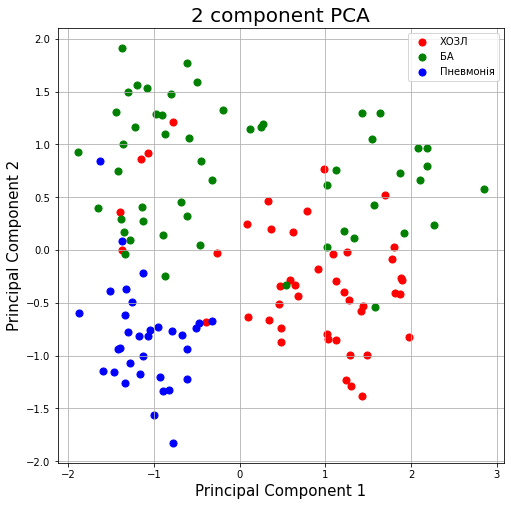

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#MinMaxScaler()
df_normalized =df_filled
groups = df_normalized.groupby("Діагноз")
for col in df_normalized.columns[1:]:
    df_normalized[col] = (df_normalized[col] - df_normalized[col].min())/ (df_normalized[col].max() - df_normalized[col].min())

x = df_normalized.iloc[:, 1:].values

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_normalized[['Діагноз']].reset_index().iloc[:, 1]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['ХОЗЛ', 'БА', 'Пневмонія']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Діагноз'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Visualize dataframe using TSNE method. Use different color for different Diagnosis types. Try to tune parameters like perplexity, learning_rate, n_iter to have better visual separation to clusters (clusters can differ from those marked by the color!!).

C:\Users\olyad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\olyad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


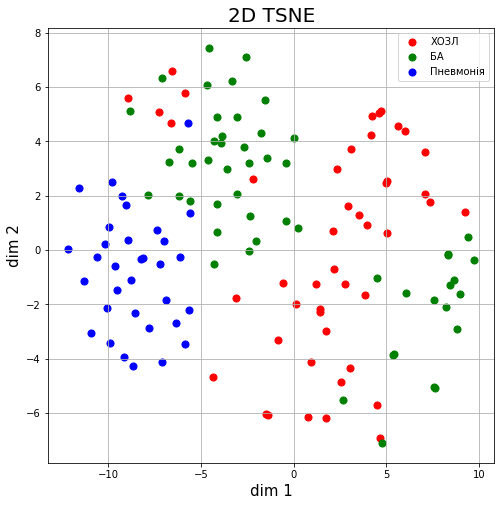

In [26]:
# Separating out the features
x = df_filled.iloc[:, 1:].values

# Separating out the target
y = df_filled.iloc[:,1].values

from sklearn.manifold import TSNE
tsne = TSNE (n_components = 2, perplexity = 30, n_iter=10000, random_state = 0)
x_2D = tsne.fit_transform(x)
tsneDf = pd.DataFrame(data = x_2D, columns = ['dim 1', 'dim 2'])
final_tsneDf = pd.concat([tsneDf, df_filled[['Діагноз']].reset_index().iloc[:, 1]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('dim 1', fontsize = 15)
ax.set_ylabel('dim 2', fontsize = 15)
ax.set_title('2D TSNE', fontsize = 20)
targets = ['ХОЗЛ', 'БА', 'Пневмонія']
for target, color in zip(targets,colors):
    indicesToKeep = final_tsneDf['Діагноз'] == target
    ax.scatter(final_tsneDf.loc[indicesToKeep, 'dim 1']
               , final_tsneDf.loc[indicesToKeep, 'dim 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

5. Add StandardScaler() or MinMaxScaler() method before visualization and compare the results with 4-th step. If they are different with the same parameters (perplexity, learning_rate, n_iter) try to explain why these differences are

C:\Users\olyad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\olyad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


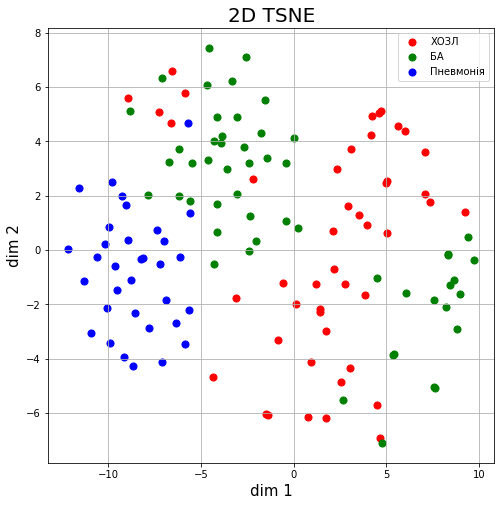

In [28]:
#MinMaxScaler()
df_normalized =df_filled
groups = df_normalized.groupby("Діагноз")
for col in df_normalized.columns[1:]:
    df_normalized[col] = (df_normalized[col] - df_normalized[col].min())/ (df_normalized[col].max() - df_normalized[col].min())

# Separating out the features
x = df_normalized.iloc[:, 1:].values

from sklearn.manifold import TSNE
tsne = TSNE (n_components = 2, perplexity = 30, n_iter=10000, random_state = 0)
x_2D = tsne.fit_transform(x)
tsneDf = pd.DataFrame(data = x_2D, columns = ['dim 1', 'dim 2'])
final1_tsneDf = pd.concat([tsneDf, df_normalized[['Діагноз']].reset_index().iloc[:, 1]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('dim 1', fontsize = 15)
ax.set_ylabel('dim 2', fontsize = 15)
ax.set_title('2D TSNE', fontsize = 20)
targets = ['ХОЗЛ', 'БА', 'Пневмонія']
for target, color in zip(targets,colors):
    indicesToKeep = final_tsneDf['Діагноз'] == target
    ax.scatter(final1_tsneDf.loc[indicesToKeep, 'dim 1']
               , final1_tsneDf.loc[indicesToKeep, 'dim 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

- compare

In [29]:
compare = final1_tsneDf.iloc[:, :-1]-final_tsneDf.iloc[:, :-1]
print("The difference dim 1: {}".format(len(compare["dim 1"][compare["dim 1"]!=0])))
print("The difference dim 2: {}".format(len(compare["dim 2"][compare["dim 2"]!=0])))
print("The values are the same, but the difference can exist because of rounding nummbers during MinMaxScaler() method")


The difference dim 1: 0
The difference dim 2: 0
The values are the same, but the difference can exist because of rounding nummbers during MinMaxScaler() method


6. Use different clustering approaches as AffinityPropagation, AgglomerativeClustering, DBSCAN, FeatureAgglomeration, KMeans, SpectralClustering, SpectralBiclustering, SpectralCoclustering (see more information https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) to divide dataframe after preprocessing (StandardScaler() or MinMaxScaler()) to 3 groups. Pay attention that it is necessary to tune parameters for each of proposed clustering algorithms.

In [30]:
def draw_separ_curve(model, ax, res = 500):
    xx0_min, xx0_max = ax.get_xlim()
    xx1_min, xx1_max = ax.get_ylim()
    xx0, xx1 = np.meshgrid(np.linspace(xx0_min, xx0_max, res), np.linspace(xx1_min, xx1_max, res))
    yy = model.predict(
        np.hstack((
            np.reshape(xx0, (res**2, 1)),
            np.reshape(xx1, (res**2, 1)))))   
    yy = yy.reshape(xx0.shape)
    ax.contour(xx0, xx1, yy, 1, colors = 'k')
    ax.set_xlim((xx0_min, xx0_max))
    ax.set_ylim((xx1_min, xx1_max)) 

y =df_normalized["Діагноз"]

AgglomerativeClustering

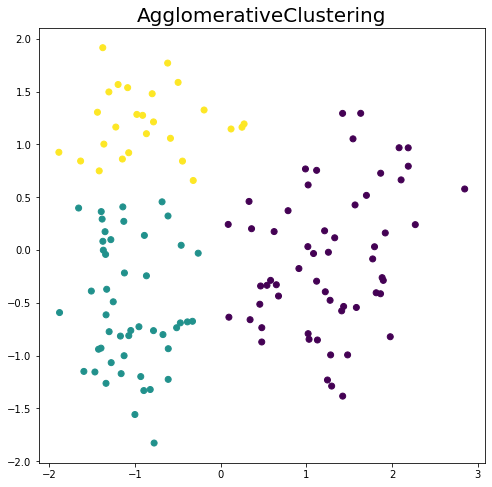

In [31]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import  cluster
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

def AgglomerativeClust(X_AC):
    aggloclust = AgglomerativeClustering(n_clusters=3).fit(X_AC)
    labels_AP = aggloclust.labels_
    n_clusters_ = aggloclust.n_clusters_
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_title('AgglomerativeClustering', fontsize = 20)

    ax.scatter(X_AC[:,0], X_AC[:,1], c=labels_AP)
    plt.show()

    AC = pd.Series({"Homogeneity": metrics.homogeneity_score(y, labels_AP), 
    "Completeness": metrics.completeness_score(y, labels_AP), 
    "V-measure": metrics.v_measure_score(y, labels_AP), 
    "Adjusted Rand Index": metrics.adjusted_rand_score(y, labels_AP),
    "Adjusted Mutual Information": metrics.adjusted_mutual_info_score(y, labels_AP)})
    return(AC)
AC = AgglomerativeClust(principalComponents)

- AffinityPropagation

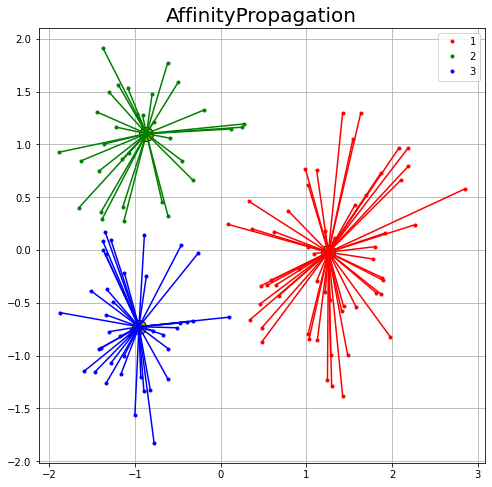

In [32]:
from sklearn.cluster import AffinityPropagation

def AffinityPropagationClust(X):
    af = AffinityPropagation(preference=-50, random_state=0).fit(X)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_
    n_clusters_ = len(cluster_centers_indices)
    
    AP = pd.DataFrame(X, columns= ["x", "y"])
    AP = pd.concat([AP, df_normalized[['Діагноз']].reset_index().iloc[:, 1]], axis = 1)

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_title('AffinityPropagation', fontsize = 20)

    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X[cluster_centers_indices[k]]
        plt.plot(X[class_members, 0], X[class_members, 1], col + ".", label=k+1)
        plt.plot(
            cluster_center[0],
            cluster_center[1],
            "o",
            markerfacecolor="y",
            markeredgecolor="k",
            markersize=14)
        for x in X[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
    ax.legend()
    ax.grid()

    AP = pd.Series({"Homogeneity": metrics.homogeneity_score(y, labels), 
    "Completeness": metrics.completeness_score(y, labels), 
    "V-measure": metrics.v_measure_score(y, labels), 
    "Adjusted Rand Index": metrics.adjusted_rand_score(y, labels),
    "Adjusted Mutual Information": metrics.adjusted_mutual_info_score(y, labels)})
    return AP
AP = AffinityPropagationClust(principalComponents)

- KMeans

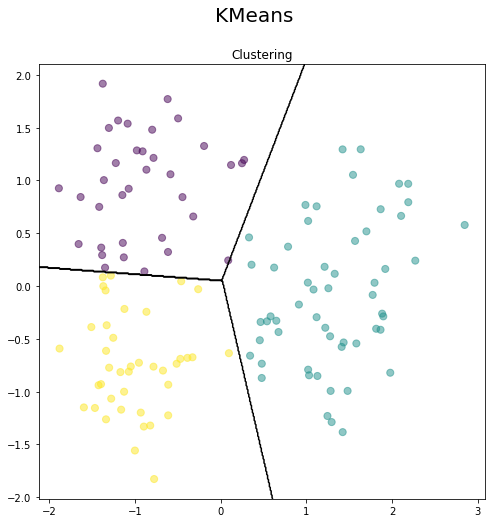

In [33]:
from sklearn.cluster import  KMeans

def KMeansClust(x):
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 40).fit(x)
    kmeans_cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    df = pd.DataFrame(x, columns = ["x", "y"])
    df = pd.concat([df, df_normalized[['Діагноз']].reset_index().iloc[:, 1]], axis = 1)

    f, ax1 = plt.subplots(1, 1, figsize=(8, 8))
    f.suptitle("KMeans", fontsize = 20)
    ax1.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    draw_separ_curve(kmeans, ax1)
    ax1.set_title("Сlustering")
    ax1.legend

    KM = pd.Series({"Homogeneity": metrics.homogeneity_score(y, labels), 
    "Completeness": metrics.completeness_score(y, labels), 
    "V-measure": metrics.v_measure_score(y, labels), 
    "Adjusted Rand Index": metrics.adjusted_rand_score(y, labels),
    "Adjusted Mutual Information": metrics.adjusted_mutual_info_score(y, labels)})
    return KM

KM=KMeansClust(principalComponents)

- DBSCAN

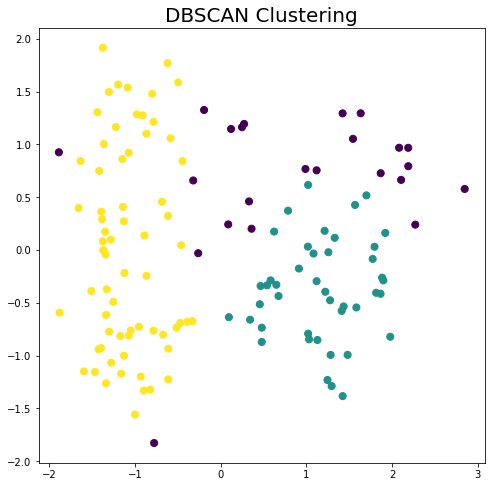

In [35]:
from sklearn.cluster import DBSCAN
def DBSCANClust(X_DBSCAN):
    dbscan=DBSCAN(eps=0.5, min_samples=10).fit(X_DBSCAN)
    labels_DBSCAN = dbscan.labels_
    n_clusters_ = len(set(labels_DBSCAN)) - (1 if -1 in labels_DBSCAN else 0)

    plt.figure(figsize=(8,8))
    plt.scatter(X_DBSCAN[:, 0],X_DBSCAN[:, 1],c= labels_DBSCAN, s=50)
    plt.title('DBSCAN Clustering',fontsize=20)

    plt.show()

    DC = pd.Series({"Homogeneity": metrics.homogeneity_score(y, labels_DBSCAN), 
    "Completeness": metrics.completeness_score(y, labels_DBSCAN), 
    "V-measure": metrics.v_measure_score(y, labels_DBSCAN), 
    "Adjusted Rand Index": metrics.adjusted_rand_score(y, labels_DBSCAN),
    "Adjusted Mutual Information": metrics.adjusted_mutual_info_score(y, labels_DBSCAN)})
    return DC
DC = DBSCANClust(principalComponents)


- SpectralClustering

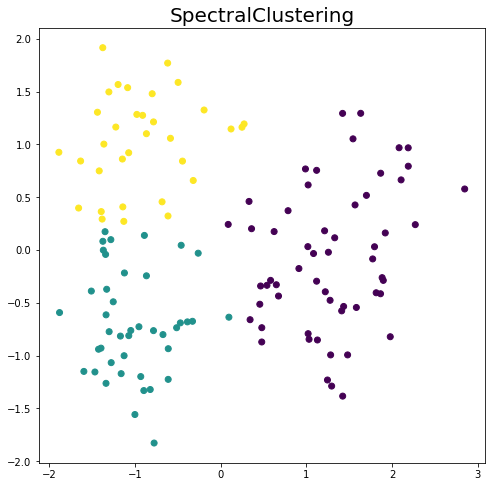

In [36]:
from sklearn.cluster import SpectralClustering
def SpectralClust(X_SC):
    clustering = SpectralClustering(n_clusters=3, assign_labels='kmeans', random_state=0).fit(X_SC)
    labels_SC = clustering.labels_

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_title('SpectralClustering', fontsize = 20)

    ax.scatter(X_SC[:,0], X_SC[:,1], c=labels_SC)
    plt.show()

    SC = pd.Series({"Homogeneity": metrics.homogeneity_score(y, labels_SC), 
    "Completeness": metrics.completeness_score(y, labels_SC), 
    "V-measure": metrics.v_measure_score(y, labels_SC), 
    "Adjusted Rand Index": metrics.adjusted_rand_score(y, labels_SC),
    "Adjusted Mutual Information": metrics.adjusted_mutual_info_score(y, labels_SC)})
    return SC
SC = SpectralClust(principalComponents)

7. Compare the results with Diagnosis column using ARI, AMI, Homogeneity, Completeness and V-measure metrics. Choose the best clustering algorithm

In [37]:
compare = pd.DataFrame([AC, AP,KM, DC, SC], index = ["Agglomerative", "AffinityPropagation", "KMeans", "DBSCAN", "SpectralClustering"])
print("KMeans is the best for this dataset")
compare

KMeans is the best for this dataset


,Homogeneity,Completeness,V-measure,Adjusted Rand Index,Adjusted Mutual Information
Agglomerative,0.371368,0.382379,0.376793,0.334256,0.367561
AffinityPropagation,0.420752,0.423404,0.422074,0.390028,0.413629
KMeans,0.436500,0.436665,0.436583,0.405006,0.428379
DBSCAN,0.311898,0.331513,0.321406,0.267819,0.311170
SpectralClustering,0.420752,0.423404,0.422074,0.390028,0.413629


8. Try to improve clustering result by adding Feature Selection preprocessing stage (before clustering stage) using methods VarianceThreshold().

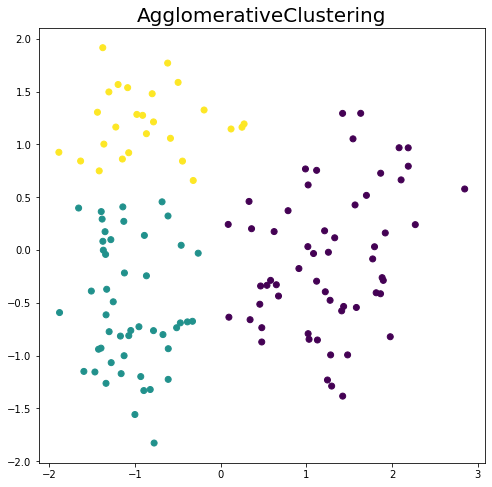

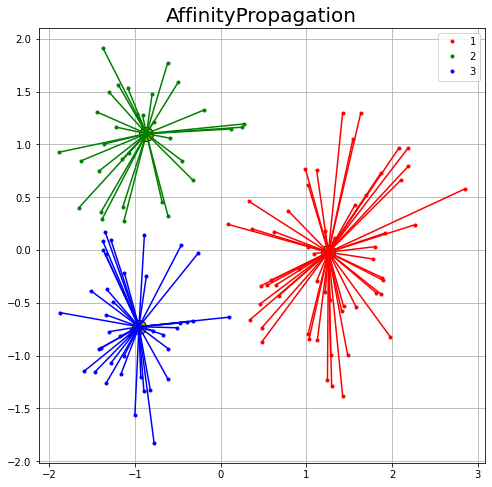

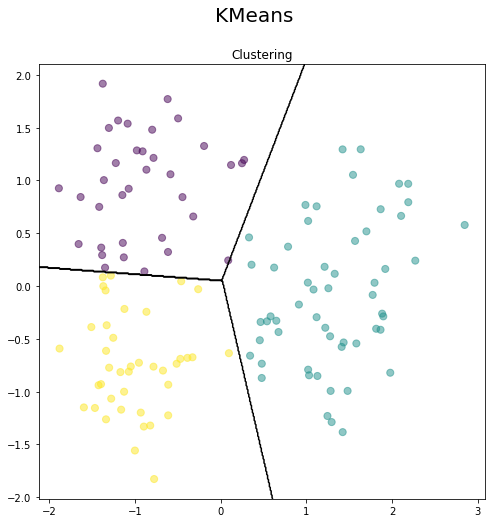

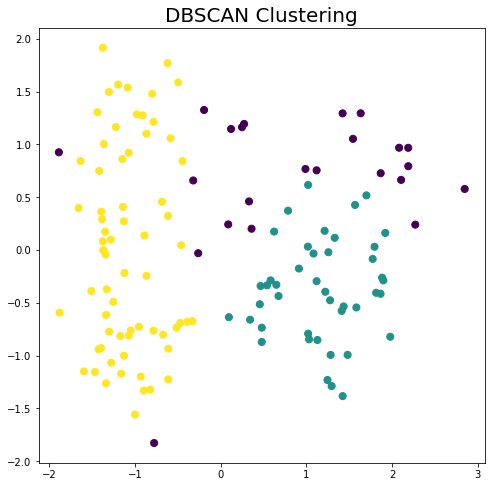

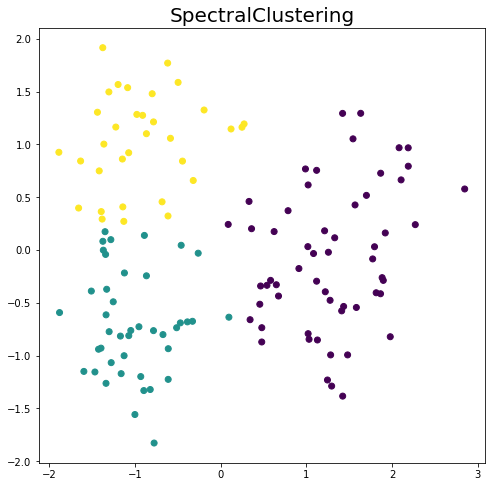

,Homogeneity,Completeness,V-measure,Adjusted Rand Index,Adjusted Mutual Information
Agglomerative,0.371368,0.382379,0.376793,0.334256,0.367561
AffinityPropagation,0.420752,0.423404,0.422074,0.390028,0.413629
KMeans,0.436500,0.436665,0.436583,0.405006,0.428379
DBSCAN,0.311898,0.331513,0.321406,0.267819,0.311170
SpectralClustering,0.420752,0.423404,0.422074,0.390028,0.413629


In [38]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold().fit_transform(df_filled.iloc[:, 1:])
pca = PCA(n_components=2)
principal = pca.fit_transform(selector)
AC1 = AgglomerativeClust(principal)
AP1 = AffinityPropagationClust(principal)
KM1 = KMeansClust(principal)
DC1 = DBSCANClust(principal)
SC1 = SpectralClust(principal)
compare = pd.DataFrame([AC1, AP1,KM1, DC1, SC1], index = ["Agglomerative", "AffinityPropagation", "KMeans", "DBSCAN", "SpectralClustering"])
compare